## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

## Import libraries

In [5]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')
! pip install tensorflow[and-cuda]
# Verify the installation:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

#pip install keras
#https://www.tensorflow.org/install/pip#windows

                                              0.0/450.5 MB ? eta -:--:--
                                              0.0/450.5 MB ? eta -:--:--
                                              0.0/450.5 MB ? eta -:--:--
                                              0.1/450.5 MB 1.3 MB/s eta 0:05:41
                                              0.2/450.5 MB 2.0 MB/s eta 0:03:49
                                              0.5/450.5 MB 3.2 MB/s eta 0:02:23
                                              0.9/450.5 MB 4.3 MB/s eta 0:01:45
                                              1.4/450.5 MB 5.4 MB/s eta 0:01:24
                                              2.1/450.5 MB 7.2 MB/s eta 0:01:03
                                              2.8/450.5 MB 8.0 MB/s eta 0:00:57
                                              3.4/450.5 MB 8.6 MB/s eta 0:00:52
                                              4.0/450.5 MB 9.1 MB/s eta 0:00:49
                                              4.0/450.5 MB 9.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\nikit\\anaconda3\\Lib\\site-packages\\~ensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_quantize_model.pyd'
Consider using the `--user` option or check the permissions.



     ----------------                         7.8/18.6 MB 14.2 MB/s eta 0:00:01
     -----------------                        8.2/18.6 MB 13.4 MB/s eta 0:00:01
     ------------------                       8.8/18.6 MB 13.4 MB/s eta 0:00:01
     --------------------                     9.4/18.6 MB 13.4 MB/s eta 0:00:01
     --------------------                     9.7/18.6 MB 12.7 MB/s eta 0:00:01
     ----------------------                  10.5/18.6 MB 13.4 MB/s eta 0:00:01
     ------------------------                11.4/18.6 MB 13.4 MB/s eta 0:00:01
     ------------------------                11.5/18.6 MB 12.6 MB/s eta 0:00:01
     -------------------------               12.3/18.6 MB 13.1 MB/s eta 0:00:01
     ---------------------------             13.0/18.6 MB 12.8 MB/s eta 0:00:01
     ----------------------------            13.3/18.6 MB 13.1 MB/s eta 0:00:01
     -----------------------------           14.1/18.6 MB 12.6 MB/s eta 0:00:01
     -------------------------------    

In [6]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [8]:

forest=pd.read_csv("C:\\Users\\nikit\\Downloads\\forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
df = forest.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)

In [10]:
df.shape

(517, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [14]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

# Feature Analysis

In [15]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [16]:
 # The dataset is biased. Lets remove the bias.
df.size_category.value_counts() 

small    378
large    139
Name: size_category, dtype: int64

# label encoding

In [17]:
#We are going to perform label encoding since it is faster than dummy variables

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
df.size_category= label_encoder.fit_transform(df.size_category) 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


# Removing Bias in the Dataset

In [18]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 378, 0: 139})
Counter({1: 368, 0: 368})


# Train | Split dataset

In [19]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

# Neural Network Modelling

Building the Model

In [20]:
# Create your first MLP in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)



Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


33/35 [===========================>..] - ETA: 0s - loss: 0.6938 - accuracy: 0.5091 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D52A890EA0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug,

# Model Evaluation

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9864


In [23]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.016759,0.994203,0.020413,0.994118,45
46,0.012218,0.997101,0.044040,0.982353,46
47,0.014876,0.997101,0.040631,0.982353,47
48,0.010653,0.997101,0.018642,0.988235,48
49,0.008752,1.000000,0.035673,0.988235,49


# Visualize Training History

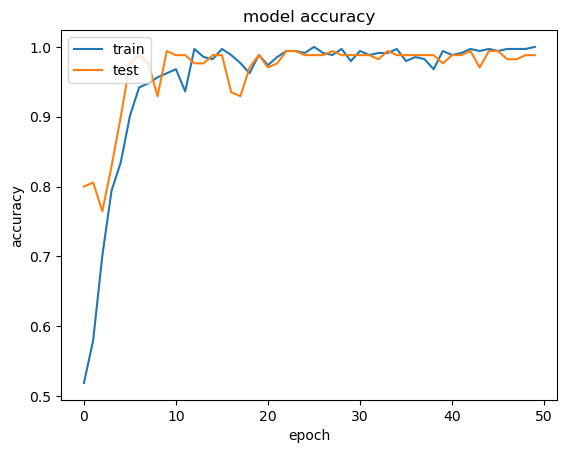

In [25]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

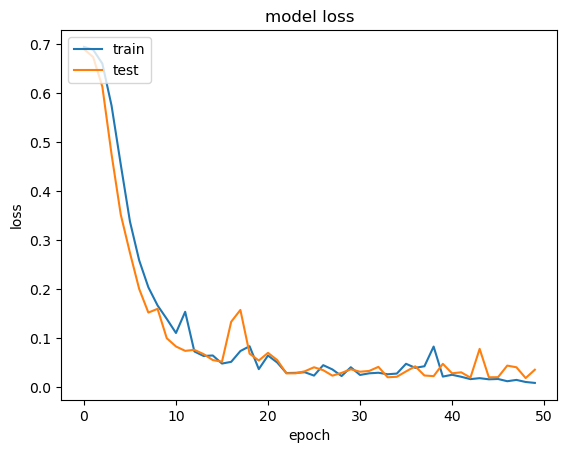

In [26]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')